### Amaan Ul Haq Siddiqui

In [95]:
import pandas as pdas

In [96]:
df = pdas.read_csv("../Datasets/iris.csv")

In [97]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
# Classification Algo
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [99]:
df = df.drop(columns=['Id'])

In [100]:
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = df['Species']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [102]:
model = SVC(kernel='linear')

In [103]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [104]:
predictions = model.predict(X_test)

In [105]:
#Testing 
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [106]:
# Clustering Algo
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
import warnings
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

KMeans(n_clusters=3, random_state=42)

In [108]:
df['Cluster'] = kmeans.labels_

In [109]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

In [110]:
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

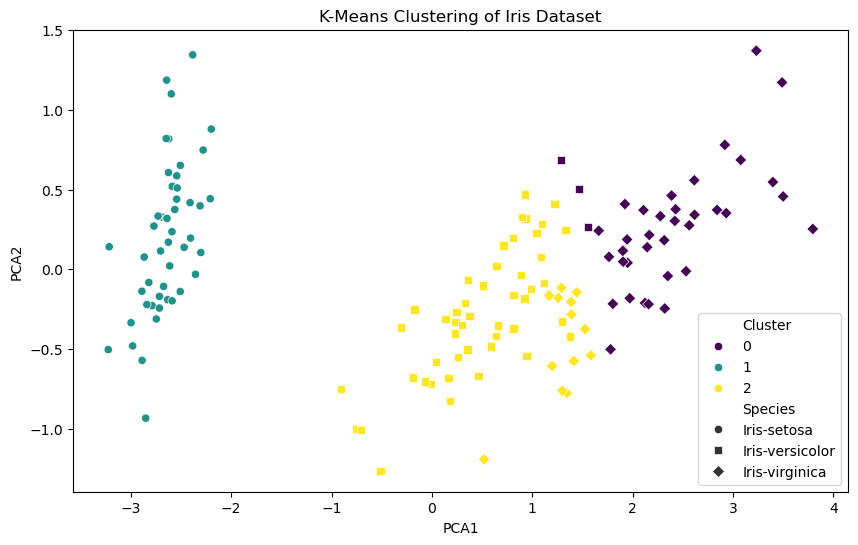

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, style='Species', markers=['o', 's', 'D'])
plt.title('K-Means Clustering of Iris Dataset')
plt.show()